# Step 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.6 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import pydicom
from pydicom.data import get_testdata_files
import os
import imageio

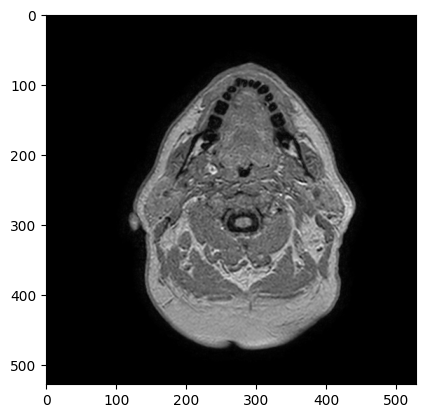

In [ ]:
ds = pydicom.dcmread('/content/drive/MyDrive/Biomedical/dicom/1-001.dcm')
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.savefig('tumor_plot1.png')

## Patient Name and Image Information

In [ ]:
vol = imageio.volread('/content/drive/MyDrive/Biomedical/dicom/1-001.dcm', format='dicom')
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/180 files (0.6%)3/180 files (1.7%)4/180 files (2.2%)16/180 files (8.9%)30/180 files (16.7%)50/180 files (27.8%)69/180 files (38.3%)87/180 files (48.3%)106/180 files (58.9%)123/180 files (68.3%)136/180 files (75.6%)146/180 files (81.1%)162/180 files (90.0%)178/180 files (98.9%)180/180 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 13/180  (7.2%)26/180  (14.4%)49/180  (27.2%)59/180  (32.8%)72/180  (40.0%)94/180  (52.2%)114/180  (63.3%)162/180  (90.0%)180/180  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'S

In [ ]:
n0, n1, n2 = vol.shape
# Print the ouput
print("Number of Slices:\n\t", "Axial=", n0,
"Slices\n\t",
"Coronal=", n1, "Slices\n\t",
"Sagittal=", n2, "Slices")

Number of Slices:
	 Axial= 180 Slices
	 Coronal= 528 Slices
	 Sagittal= 528 Slices


In [ ]:
# The sampling of the stacked images in each plane
# (Axial, Coronal, and Sagittal, respectively)
d0, d1, d2 = vol.meta['sampling']
# in mm
# Print the output
print("Sampling:\n\t", "Axial=", d0, "mm\n\t",
"Coronal=", d1, "mm\n\t",
"Sagittal=", d2, "mm")

Sampling:
	 Axial= 0.9999999999999967 mm
	 Coronal= 0.49242424964904 mm
	 Sagittal= 0.49242424964904 mm


In [ ]:
# The aspect ratio along the axial plane
axial_asp = d1/d2
# The aspect ratio along the sagittal plane
sagittal_asp = d0/d1
# The aspect ratio along the coronal plane
coronal_asp = d0/d2
# Print the output
print("Pixel Aspect Ratio:\n\t", "Axial=", axial_asp, "\n\t",
"Coronal=", coronal_asp, "\n\t", "Sagittal=", sagittal_asp)

Pixel Aspect Ratio:
	 Axial= 1.0 
	 Coronal= 2.030769200973988 
	 Sagittal= 2.030769200973988


In [ ]:
print("Field of View:\n\t", "Axial=", n0*d0,
"mm\n\t", "Coronal=", n1*d1, "mm\n\t",
"Sagittal=", n2*d2, "mm")

Field of View:
	 Axial= 179.9999999999994 mm
	 Coronal= 260.0000038146931 mm
	 Sagittal= 260.0000038146931 mm


## End of Step 1

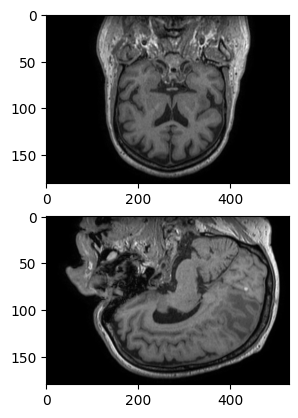

In [ ]:
# Select frame from "vol”
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]
# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1
# Plot the images on a subplots array
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()

In [ ]:
# read all the file
df = []
pixels= []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Biomedical/dicom'):
    for filename in filenames:
        dataset = pydicom.dcmread(os.path.join(dirname, filename))
        df.append(dataset)
        pixels.append(dataset.pixel_array)

In [ ]:
## Patient Meta data
df[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.2857.3159.199775229400274092737549228822
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0012) Instance Creation Date              DA: '20000423'
(0008, 0013) Instance Creation Time              TM: '040216.995'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.14519.5.2.1

In [ ]:
print(df[0].PatientName)
print(df[0].PatientSex)
print(df[0].SliceLocation)
print(df[0].PixelSpacing)
print(df[0].SpacingBetweenSlices)


C3L-00629
M
3084.06764984130
[0.49242424964904, 0.49242424964904]
1
Pixel Aspect Ratio: 1.0
Field of View: 260.0000038146931


## Image Shape, Sampling, Pixel Aspect ratio and field of view of the images used.

In [ ]:
ds = pydicom.dcmread('/content/drive/MyDrive/Biomedical/dicom/1-001.dcm')

shape = ds.pixel_array.shape
print("Shape:", shape)

# Sampling information
pixel_spacing = ds.PixelSpacing
sampling = (float(pixel_spacing[0]), float(pixel_spacing[1]))
print("Sampling:", sampling)

# Pixel aspect ratio
pixel_spacing = ds.PixelSpacing
rows = ds.Rows
columns = ds.Columns

pixel_aspect_ratio = pixel_spacing[1] / pixel_spacing[0]
field_of_view = pixel_spacing[0] * rows


print("Pixel Aspect Ratio:", pixel_aspect_ratio)
print("Field of View:", field_of_view)

# Field of view
field_of_view = (shape[0] * sampling[0], shape[1] * sampling[1])
print("Field of View:", field_of_view)

Shape: (528, 528)
Sampling: (0.49242424964904, 0.49242424964904)
Pixel Aspect Ratio: 1.0
Field of View: 260.0000038146931
Field of View: (260.0000038146931, 260.0000038146931)


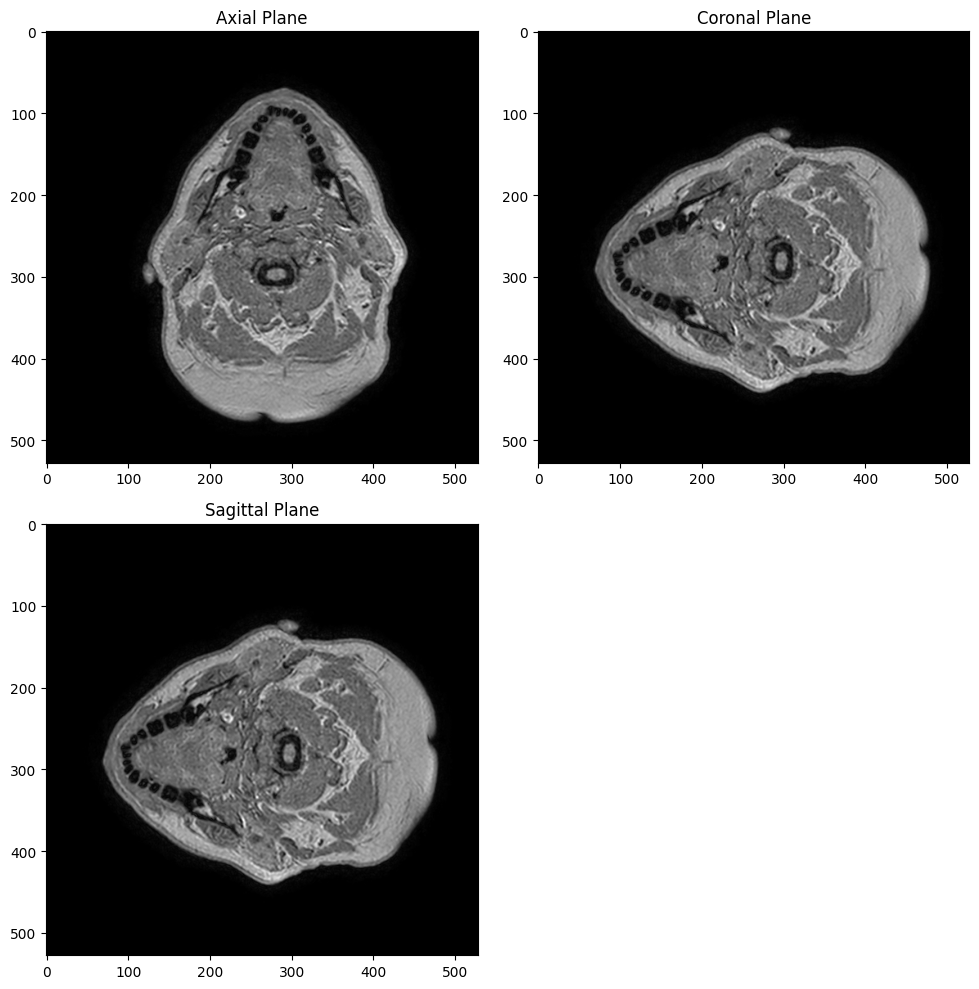

In [ ]:
import matplotlib.pyplot as plt

ds = pydicom.dcmread('/content/drive/MyDrive/Biomedical/dicom/1-001.dcm')

# Slice along the z-axis (axial plane)
axial_slice = ds.pixel_array

# Slice along the y-axis (coronal plane)
coronal_slice = ds.pixel_array.transpose()

# Slice along the x-axis (sagittal plane)
sagittal_slice = ds.pixel_array.transpose()

# Display the slices
plt.figure(figsize=(10, 10))

# Axial plane
plt.subplot(2, 2, 1)
plt.imshow(axial_slice, cmap=plt.cm.gray)
plt.title('Axial Plane')

# Coronal plane
plt.subplot(2, 2, 2)
plt.imshow(coronal_slice, cmap=plt.cm.gray)
plt.title('Coronal Plane')

# Sagittal plane
plt.subplot(2, 2, 3)
plt.imshow(sagittal_slice, cmap=plt.cm.gray)
plt.title('Sagittal Plane')

plt.tight_layout()
plt.show()

# Step 2 and 3

In [ ]:
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation

100% 4.16G/4.16G [02:50<00:00, 28.7MB/s]
100% 4.16G/4.16G [02:50<00:00, 26.2MB/s]


In [ ]:
!unzip "/content/brats20-dataset-training-validation.zip" -d "/content/"

Archive:  /content/brats20-dataset-training-validation.zip
  inflating: /content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii  
  inflating: /content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii  
  inflating: /content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii  
  inflating: /content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii  
  inflating: /content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii  
  inflating: /content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_flair.nii  
  inflating: /content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_seg.nii  
  inflating: /content/BraTS2020_TrainingData/MICC

In [ ]:
!pip -q install imutils

In [ ]:
!pip -q install keras matplotlib nibabel nifti2gif nilearn numpy opencv-python pandas pydot scikit-image seaborn tensorflow

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 104.4 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps  


# neural imaging
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt
import nifti2gif.core as nifti2gif


# ml libs
import keras
import keras.backend as K
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
# DEFINE seg-areas  
SEGMENT_CLASSES = {
    0 : 'NOT tumor',
    1 : 'NECROTIC/CORE', #refers to the dead or dying cells within the tumor.
    2 : 'EDEMA', #refers to the swelling or accumulation of fluid in the brain tissue
    3 : 'ENHANCING' #refers to the regions where the tumor exhibits increased contrast enhancement compared to the surrounding tissue.
}

# there are 155 slices per volume
# to start at 5 and use 145 slices means we will skip the first 5 and last 5 
VOLUME_SLICES = 100 
VOLUME_START_AT = 22 # first slice of volume that we will include

Text(0.5, 1.0, 'Mask')

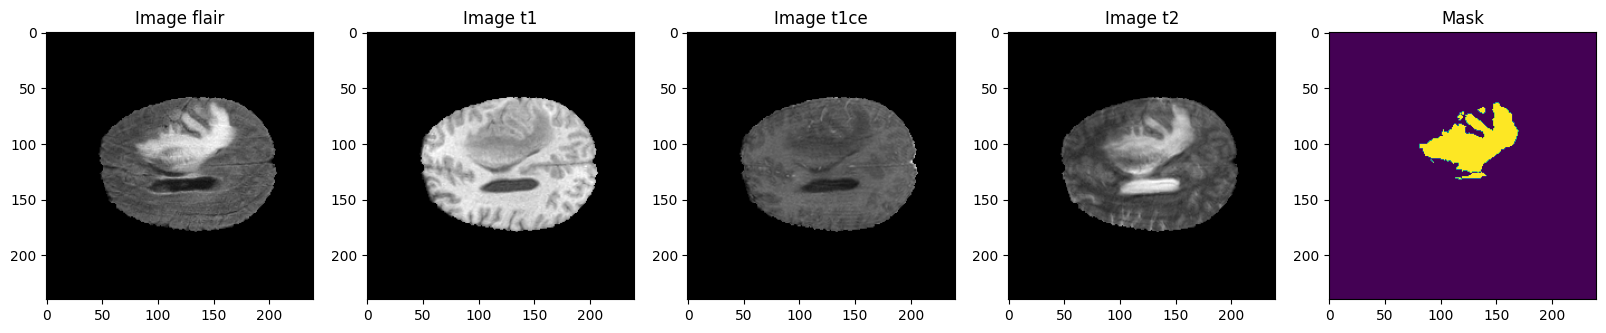

In [ ]:
TRAIN_DATASET_PATH = '/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
VALIDATION_DATASET_PATH = '/content/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1.nii').get_fdata()
test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1ce.nii').get_fdata()
test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t2.nii').get_fdata()
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii').get_fdata()


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 25
ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')

In [ ]:
test_image_flair.shape

(240, 240, 155)

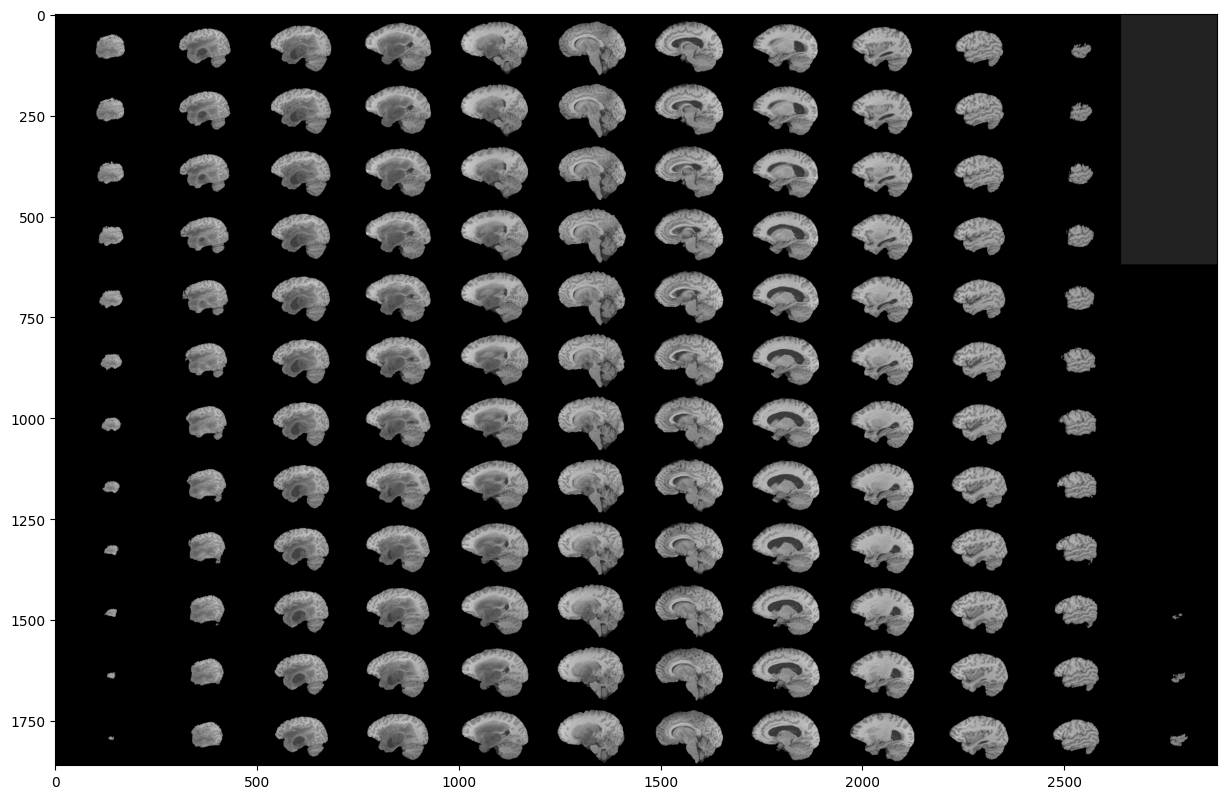

In [ ]:
# Skip 50:-50 slices since there is not much to see
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_image_t1[50:-50,:,:]), 90, resize=True), cmap ='gray')

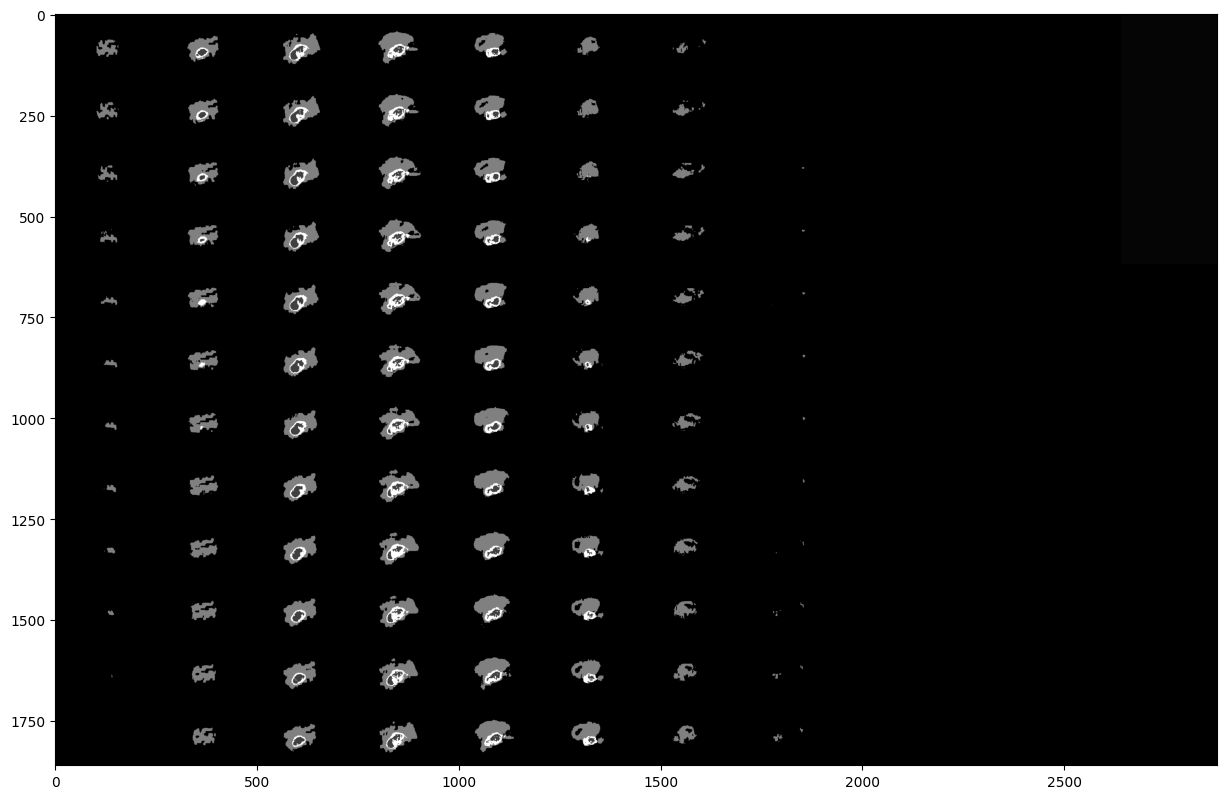

In [ ]:
# Skip 50:-50 slices since there is not much to see
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_mask[50:-50,:,:]), 90, resize=True), cmap ='gray')

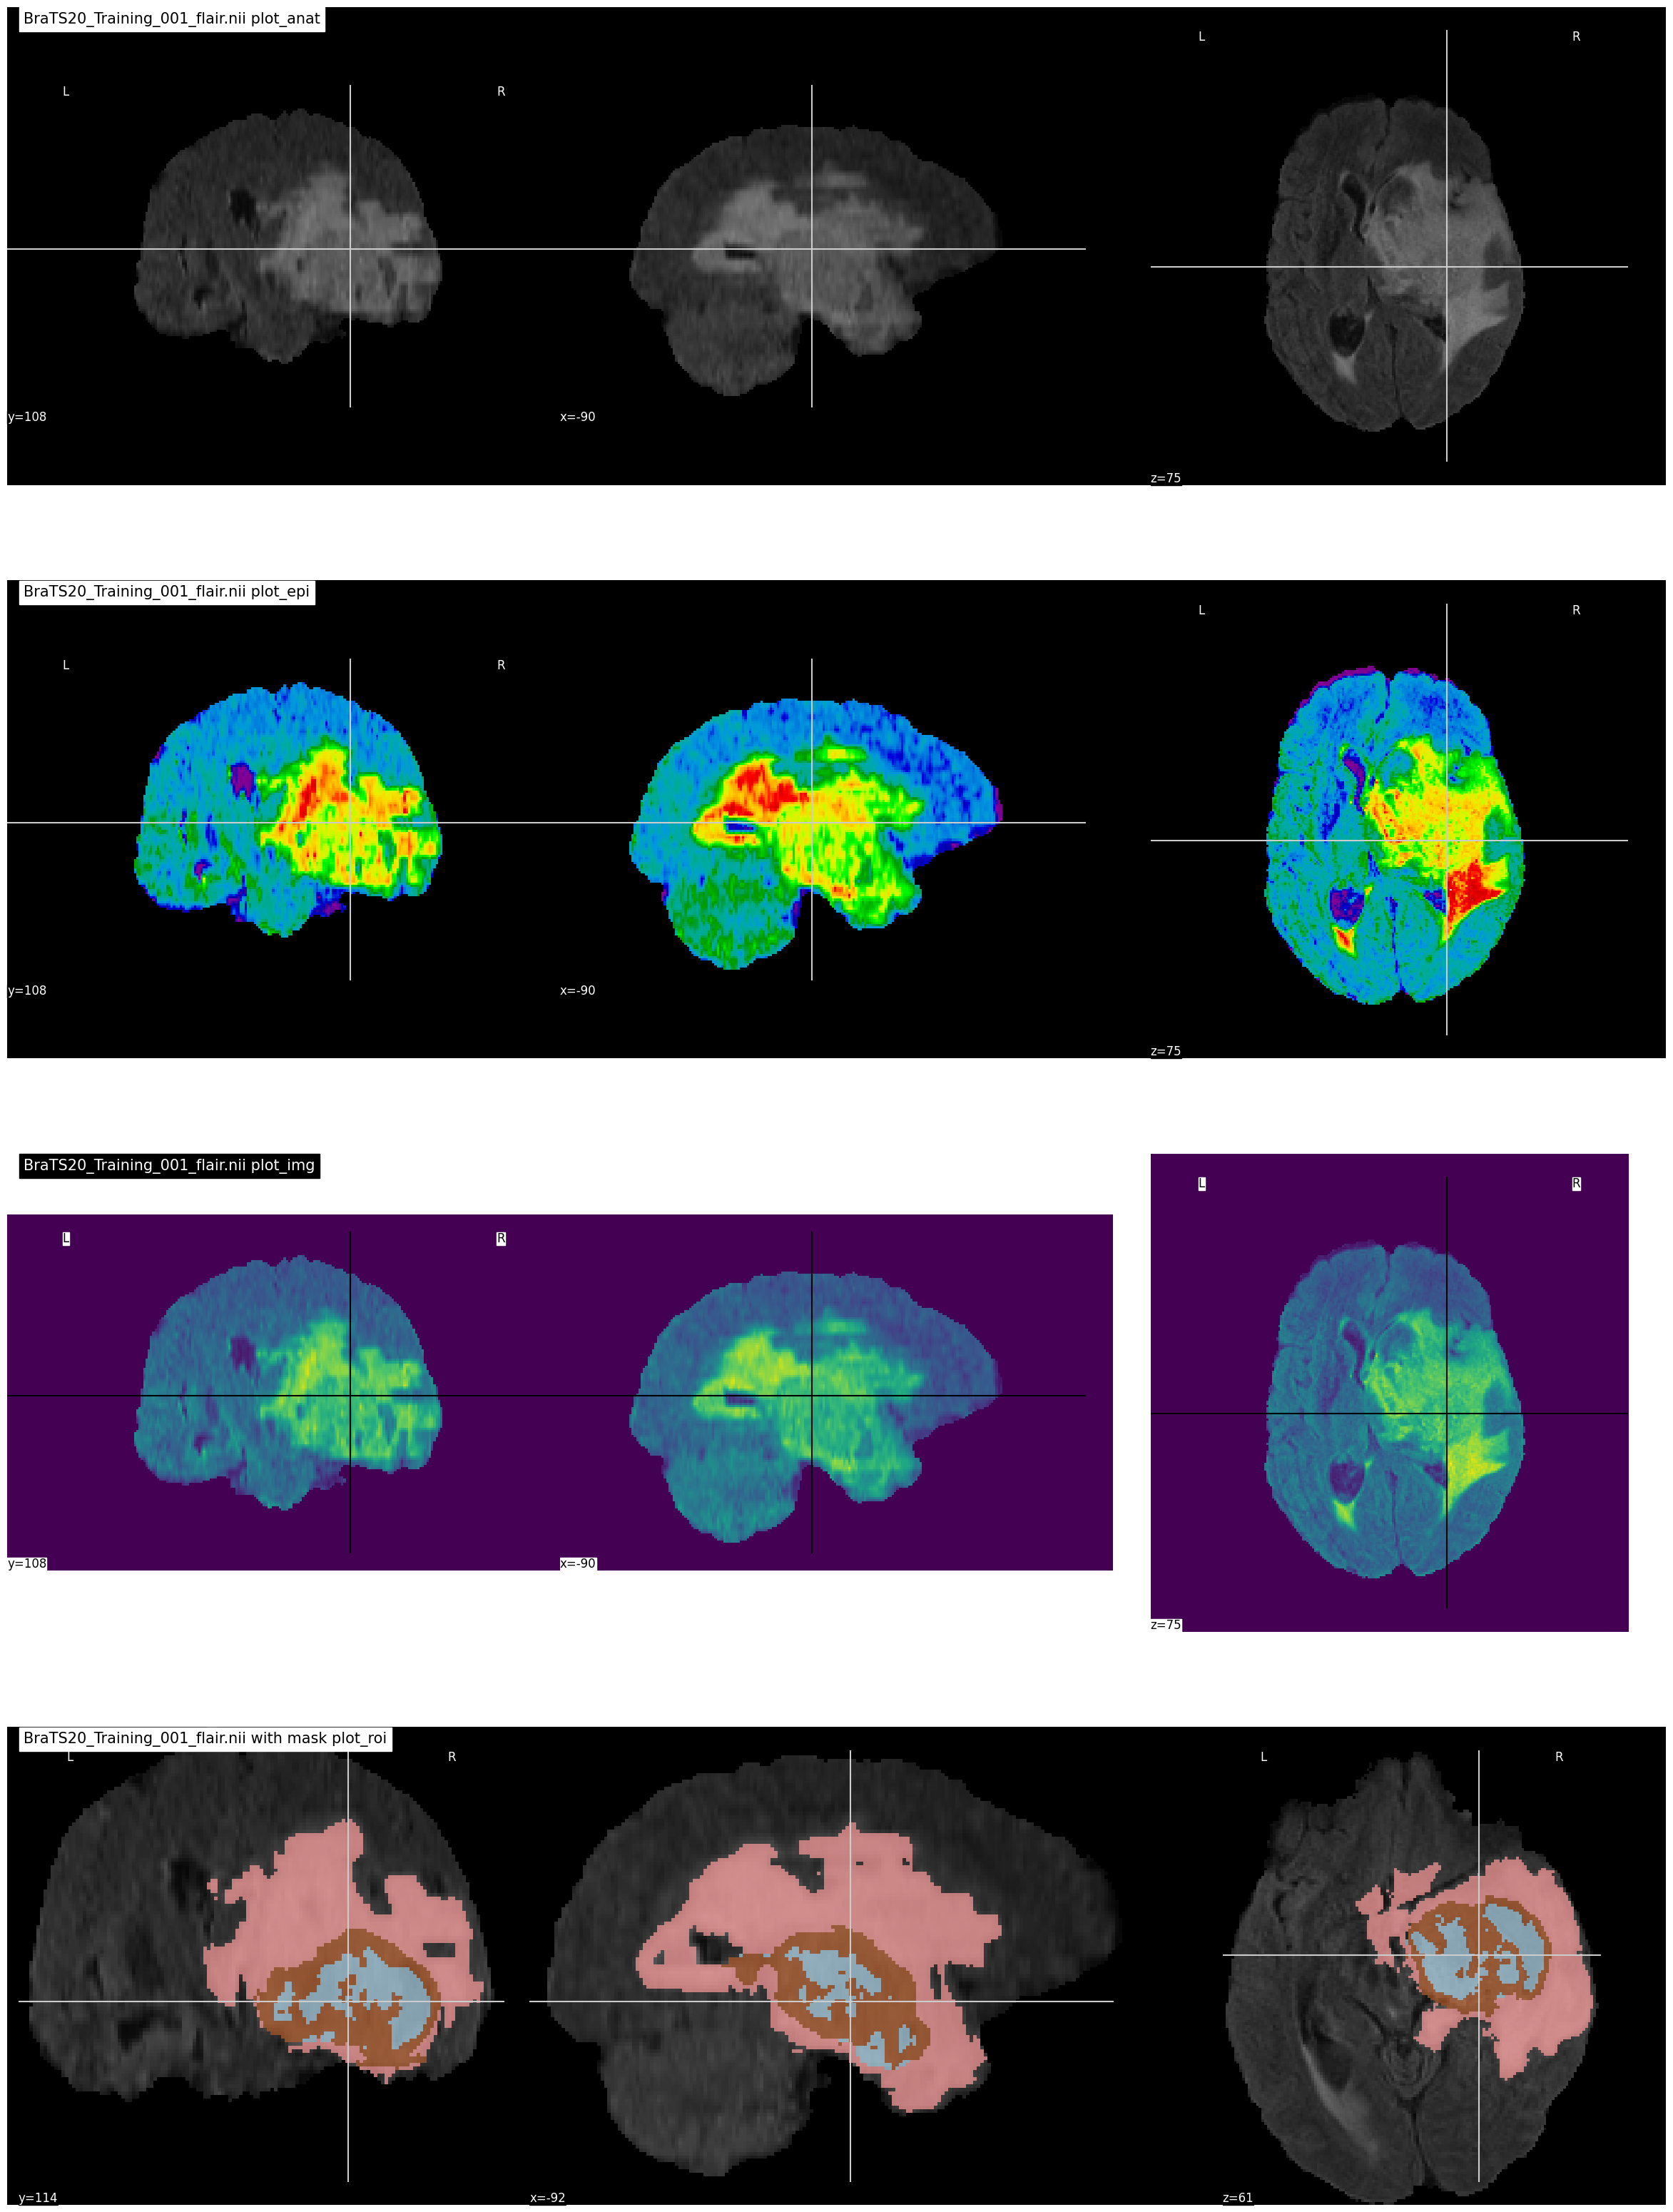

In [ ]:
niimg = nl.image.load_img(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii')
nimask = nl.image.load_img(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii')

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))

# Anatomical images typically capture the structural information of the brain

nlplt.plot_anat(niimg,
                title='BraTS20_Training_001_flair.nii plot_anat',
                axes=axes[0])

#  brain's activity by detecting changes in blood oxygenation levels.

nlplt.plot_epi(niimg,
               title='BraTS20_Training_001_flair.nii plot_epi',
               axes=axes[1])

# This function is a general-purpose image plotting function that can be used for various types of neuroimaging data, including both anatomical and functional images. 
nlplt.plot_img(niimg,
               title='BraTS20_Training_001_flair.nii plot_img',
               axes=axes[2])
# plotting images with mask overlays. 
nlplt.plot_roi(nimask, 
               title='BraTS20_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg, 
               axes=axes[3], cmap='Paired')

plt.show()

## Morphological Operations

In [ ]:
import cv2

<ipython-input-10-d227d8fffc96>:15: FutureWarning: `selem` is a deprecated argument name for `binary_erosion`. It will be removed in version 1.0. Please use `footprint` instead.
  eroded_data = binary_erosion(image_data, selem=selem)
<ipython-input-10-d227d8fffc96>:18: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  dilated_data = binary_dilation(image_data,selem=selem)
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


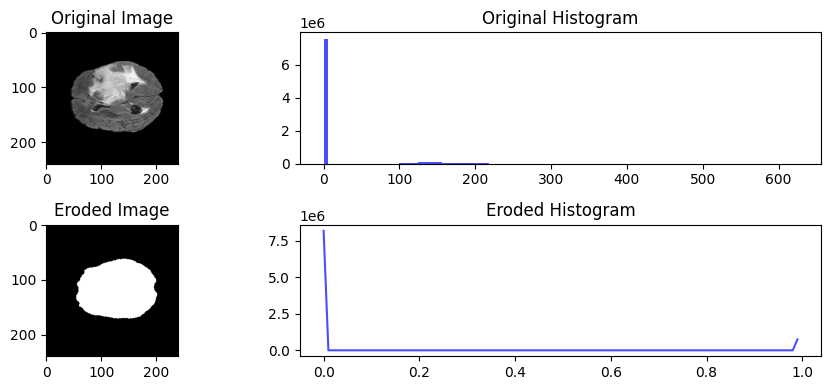

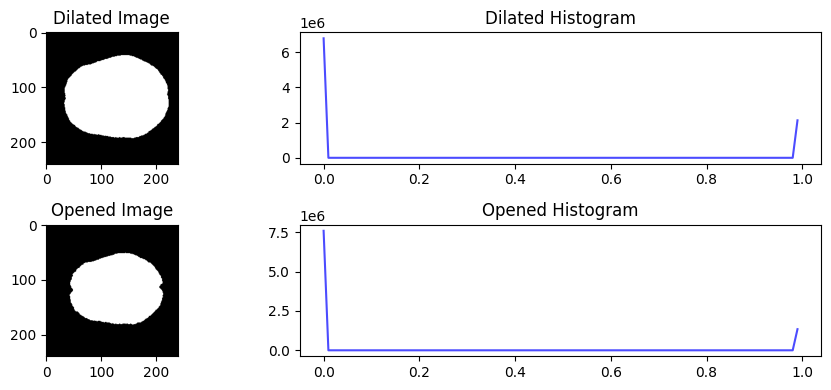

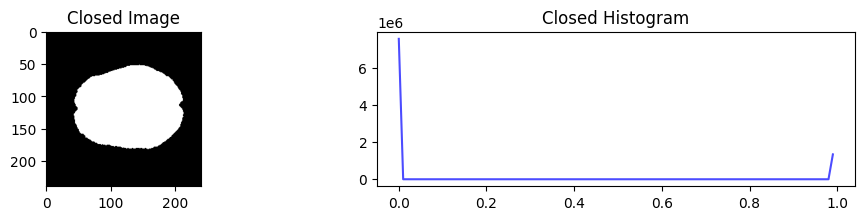

In [ ]:
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, ball

def apply_morphological_operations(image):
  # Get the image data
  image_data = image.get_fdata()

  # Define the size of the structuring element
  radius = 2

  # Create a disk-shaped structuring element
  selem = ball(radius)


  # Apply erosion operation
  eroded_data = binary_erosion(image_data, selem=selem)

  # Apply dilation operation
  dilated_data = binary_dilation(image_data,selem=selem)

  # Apply opening operation
  opened_data = binary_opening(image_data)

  # Apply closing operation
  closed_data = binary_closing(image_data)

  # Create enhanced images
  enhanced_eroded = nib.Nifti1Image(eroded_data, image.affine, image.header)
  enhanced_dilated = nib.Nifti1Image(dilated_data, image.affine, image.header)
  enhanced_opened = nib.Nifti1Image(opened_data, image.affine, image.header)
  enhanced_closed = nib.Nifti1Image(closed_data, image.affine, image.header)

  plt.figure(figsize=(10, 4))
  plt.subplot(2, 2, 1)
  plt.imshow(image_data[:, :, image_data.shape[2] // 2], cmap='gray')
  plt.title('Original Image')
  plt.subplot(2, 2, 2)
  plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
  plt.title('Original Histogram')

  # Plot the enhanced images and histograms
  plt.subplot(2, 2, 3)
  plt.imshow(eroded_data[:, :, image_data.shape[2] // 2], cmap='gray')
  plt.title('Eroded Image')
  plt.subplot(2, 2, 4)
  hist_eroded, bins_eroded = np.histogram(eroded_data.flatten(), bins=100)
  plt.plot(bins_eroded[:-1], hist_eroded, color='blue', alpha=0.7)
  plt.title('Eroded Histogram')

  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(10, 4))
  plt.subplot(2, 2, 1)
  plt.imshow(dilated_data[:, :, image_data.shape[2] // 2], cmap='gray')
  plt.title('Dilated Image')

  plt.subplot(2, 2, 2)
  hist_dilated, bins_dilated = np.histogram(dilated_data.flatten(), bins=100)
  plt.plot(bins_dilated[:-1], hist_dilated, color='blue', alpha=0.7)
  plt.title('Dilated Histogram')

  plt.subplot(2, 2, 3)
  plt.imshow(opened_data[:, :, image_data.shape[2] // 2], cmap='gray')
  plt.title('Opened Image')

  plt.subplot(2, 2, 4)
  hist_opened, bins_opened = np.histogram(opened_data.flatten(), bins=100)
  plt.plot(bins_opened[:-1], hist_opened, color='blue', alpha=0.7)
  plt.title('Opened Histogram')

  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(10, 4))
  plt.subplot(2, 2, 1)
  plt.imshow(closed_data[:, :, image_data.shape[2] // 2], cmap='gray')
  plt.title('Closed Image')
  plt.subplot(2, 2, 2)
  hist_closed, bins_closed = np.histogram(closed_data.flatten(), bins=100)
  plt.plot(bins_closed[:-1], hist_closed, color='blue', alpha=0.7)
  plt.title('Closed Histogram')

  plt.tight_layout()
  plt.show()

  
  return enhanced_eroded, enhanced_dilated, enhanced_opened, enhanced_closed


# Assuming you have the NIfTI file path
image_path = TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii'

# Load the NIfTI image using nibabel
image = nib.load(image_path)

# Apply morphological operations and calculate histograms
enhanced_eroded, enhanced_dilated, enhanced_opened, enhanced_closed = apply_morphological_operations(image)

In [ ]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
   #     K.print_tensor(loss, message='loss value for class {} : '.format(SEGMENT_CLASSES[i]))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
#    K.print_tensor(total_loss, message=' total dice coef: ')
    return total_loss


 
# define per class evaluation of dice coef
# inspired by https://github.com/keras-team/keras/issues/9395
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[:,:,:,3])) + epsilon)



# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    
# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
def build_unet(img_size, ker_init, dropout):
    inputs = Input(shape=(img_size, img_size, 2))
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)
    
    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)
    
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = SpatialDropout2D(dropout)(conv5)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)
    
    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    conv10 = Conv2D(4, (1,1), activation = 'softmax')(conv)
    
    return Model(inputs = inputs, outputs = conv10)

In [ ]:
mirrored_strategy = tf.distribute.MirroredStrategy()

In [ ]:
IMG_SIZE=128

with mirrored_strategy.scope():
    model = build_unet(IMG_SIZE, 'he_normal', 0.2)
    model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema ,dice_coef_enhancing] )

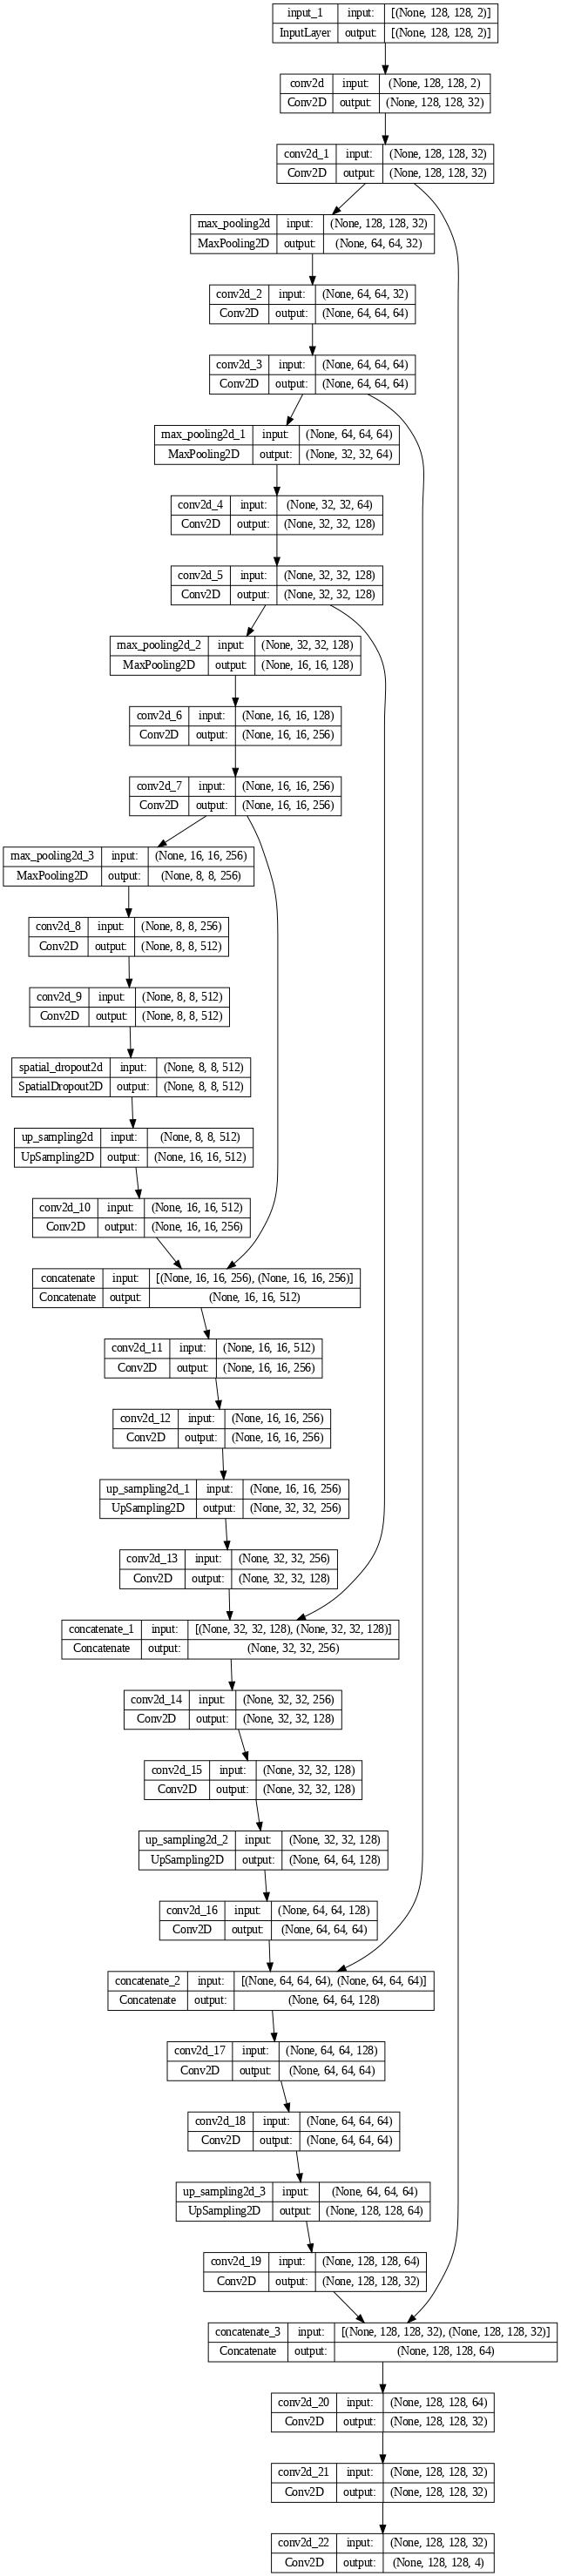

In [ ]:
plot_model(model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

In [ ]:
# lists of directories with studies
train_and_val_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]

# file BraTS20_Training_355 has ill formatted name for for seg.nii file
train_and_val_directories.remove(TRAIN_DATASET_PATH+'BraTS20_Training_355')


def pathListIntoIds(dirList):
    x = []
    for i in range(0,int(len(dirList)/1.25)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_and_test_ids = pathListIntoIds(train_and_val_directories); 

    
train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.2) 
train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15) 

In [ ]:
IMG_SIZE = 128
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))
        Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))

        
        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(TRAIN_DATASET_PATH, i)

            data_path = os.path.join(case_path, f'{i}_flair.nii');
            flair = nib.load(data_path).get_fdata()    

            data_path = os.path.join(case_path, f'{i}_t1ce.nii');
            ce = nib.load(data_path).get_fdata()
            
            data_path = os.path.join(case_path, f'{i}_seg.nii');
            seg = nib.load(data_path).get_fdata()
        
            for j in range(VOLUME_SLICES):
                 X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
                 X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

                 y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
                    
        # Generate masks
        y[y==4] = 3;
        mask = tf.one_hot(y, 4);
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
        return X/np.max(X), Y
        
training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)

In [ ]:
csv_logger = CSVLogger('training.log', separator=',', append=False)


callbacks = [
#     keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,
#                               patience=2, verbose=1, mode='auto'),
      keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1),
#  keras.callbacks.ModelCheckpoint(filepath = 'model_.{epoch:02d}-{val_loss:.6f}.m5',
#                             verbose=1, save_best_only=True, save_weights_only = True)
        csv_logger
    ]

In [ ]:
history =  model.fit(training_generator,
                      epochs=5,
                      steps_per_epoch=len(train_ids),
                      callbacks= callbacks,
                      validation_data = valid_generator
                     )  

Epoch 1/5
199/199 [==============================] - 190s 819ms/step - loss: 0.1541 - accuracy: 0.9715 - mean_io_u: 0.5750 - dice_coef: 0.2590 - precision: 0.9611 - sensitivity: 0.9464 - specificity: 0.9941 - dice_coef_necrotic: 0.0449 - dice_coef_edema: 0.1031 - dice_coef_enhancing: 0.0402 - val_loss: 0.0691 - val_accuracy: 0.9868 - val_mean_io_u: 0.5509 - val_dice_coef: 0.2765 - val_precision: 0.9870 - val_sensitivity: 0.9864 - val_specificity: 0.9957 - val_dice_coef_necrotic: 0.0990 - val_dice_coef_edema: 0.1936 - val_dice_coef_enhancing: 0.1151 - lr: 1.0000e-04
Epoch 2/5
199/199 [==============================] - 182s 916ms/step - loss: 0.0714 - accuracy: 0.9827 - mean_io_u: 0.5457 - dice_coef: 0.2998 - precision: 0.9852 - sensitivity: 0.9811 - specificity: 0.9951 - dice_coef_necrotic: 0.1268 - dice_coef_edema: 0.2063 - dice_coef_enhancing: 0.1481 - val_loss: 0.0448 - val_accuracy: 0.9879 - val_mean_io_u: 0.5610 - val_dice_coef: 0.3242 - val_precision: 0.9910 - val_sensitivity: 0.9

In [ ]:
model.save("/content/drive/MyDrive/Biomedical/model2.h5")

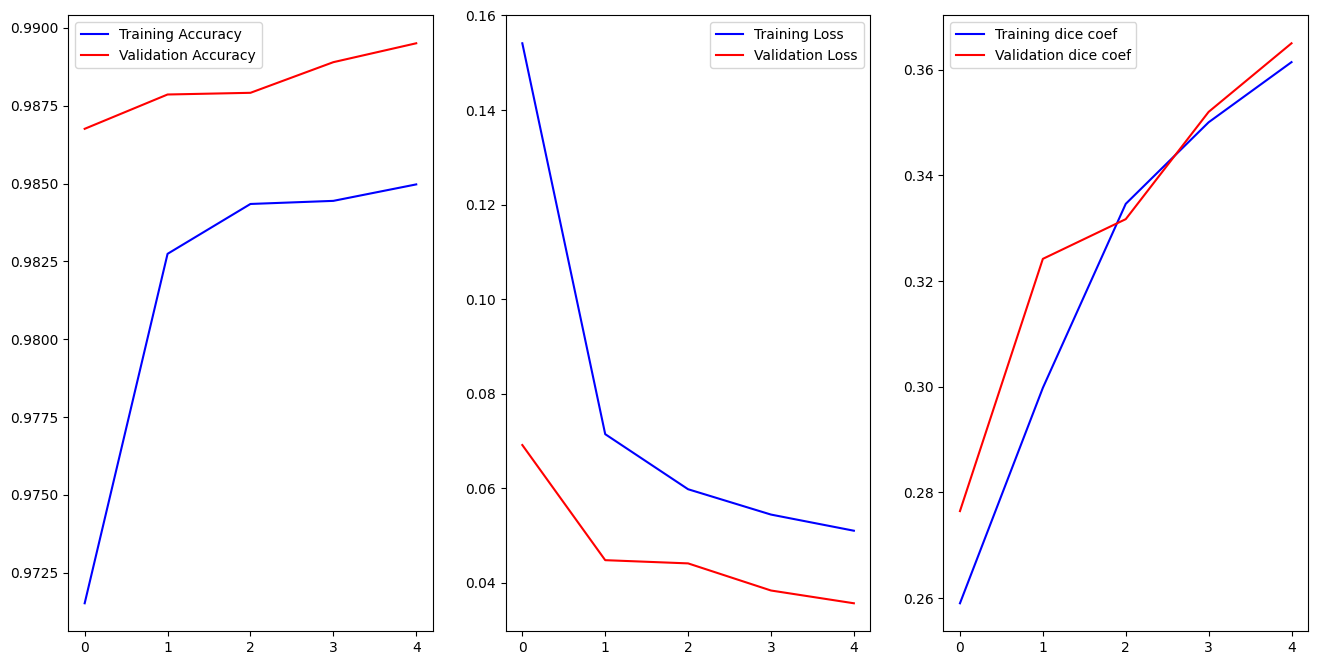

In [ ]:
model = keras.models.load_model('/content/model_x1_1.h5', 
                                   custom_objects={ 'accuracy' : tf.keras.metrics.MeanIoU(num_classes=4),
                                                   "dice_coef": dice_coef,
                                                   "precision": precision,
                                                   "sensitivity":sensitivity,
                                                   "specificity":specificity,
                                                   "dice_coef_necrotic": dice_coef_necrotic,
                                                   "dice_coef_edema": dice_coef_edema,
                                                   "dice_coef_enhancing": dice_coef_enhancing
                                                  }, compile=False)


hist=history.history

acc=hist['accuracy']
val_acc=hist['val_accuracy']

epoch=range(len(acc))

loss=hist['loss']
val_loss=hist['val_loss']

train_dice=hist['dice_coef']
val_dice=hist['val_dice_coef']

f,ax=plt.subplots(1,3,figsize=(16,8))

ax[0].plot(epoch,acc,'b',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'r',label='Validation Accuracy')
ax[0].legend()

ax[1].plot(epoch,loss,'b',label='Training Loss')
ax[1].plot(epoch,val_loss,'r',label='Validation Loss')
ax[1].legend()

ax[2].plot(epoch,train_dice,'b',label='Training dice coef')
ax[2].plot(epoch,val_dice,'r',label='Validation dice coef')
ax[2].legend()



plt.show()

## Test

4/4 [==============================] - 4s 273ms/step


<Figure size 1800x5000 with 0 Axes>

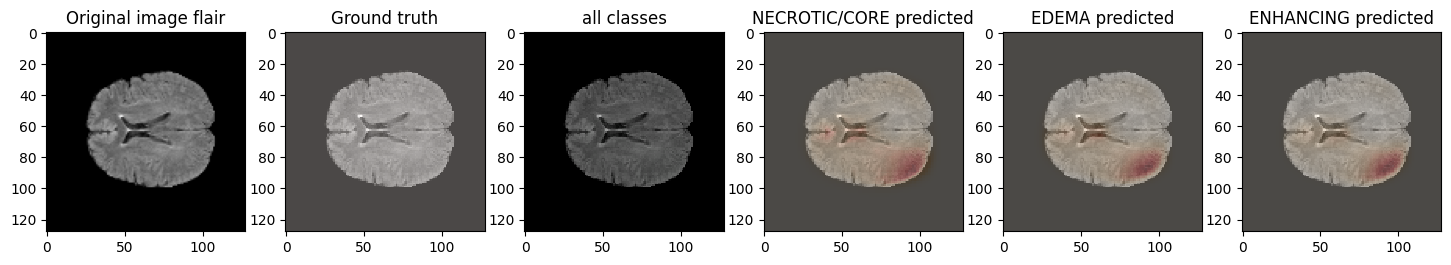

4/4 [==============================] - 0s 44ms/step


<Figure size 1800x5000 with 0 Axes>

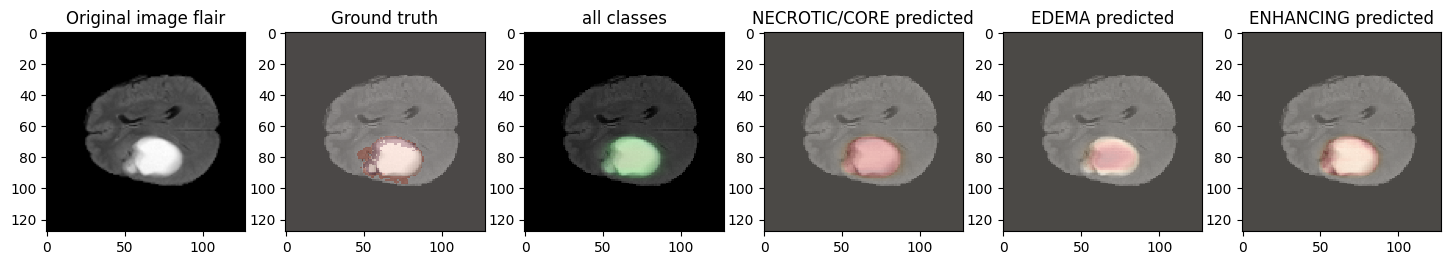

4/4 [==============================] - 0s 54ms/step


<Figure size 1800x5000 with 0 Axes>

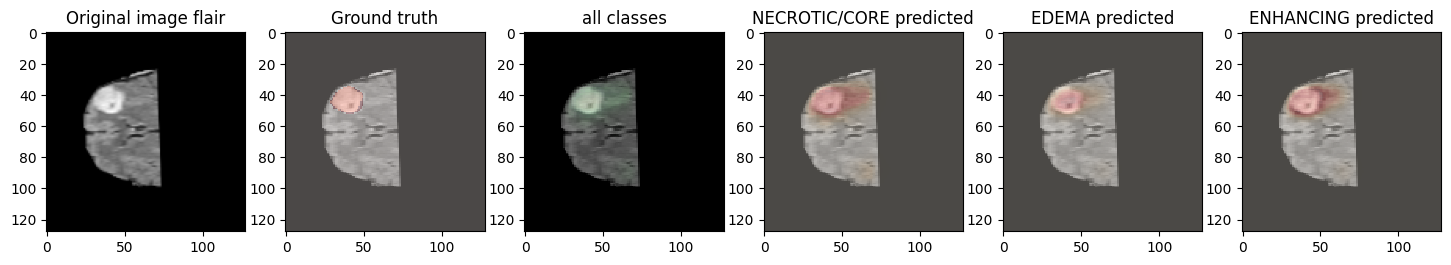

4/4 [==============================] - 0s 44ms/step


<Figure size 1800x5000 with 0 Axes>

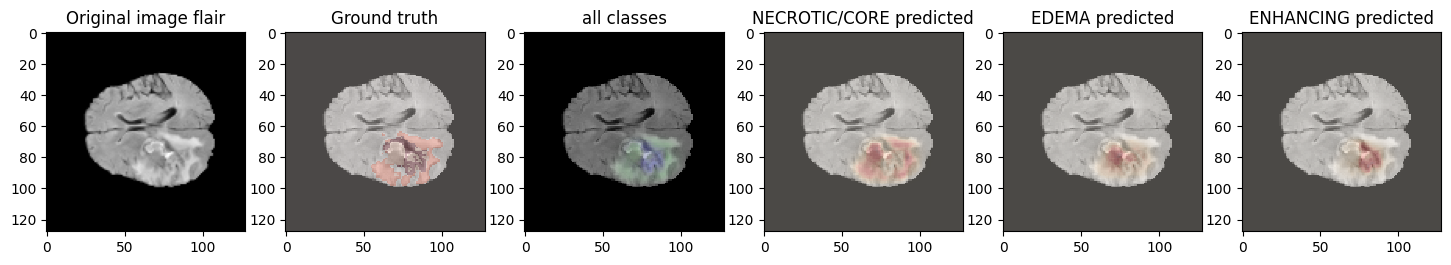

4/4 [==============================] - 0s 44ms/step


<Figure size 1800x5000 with 0 Axes>

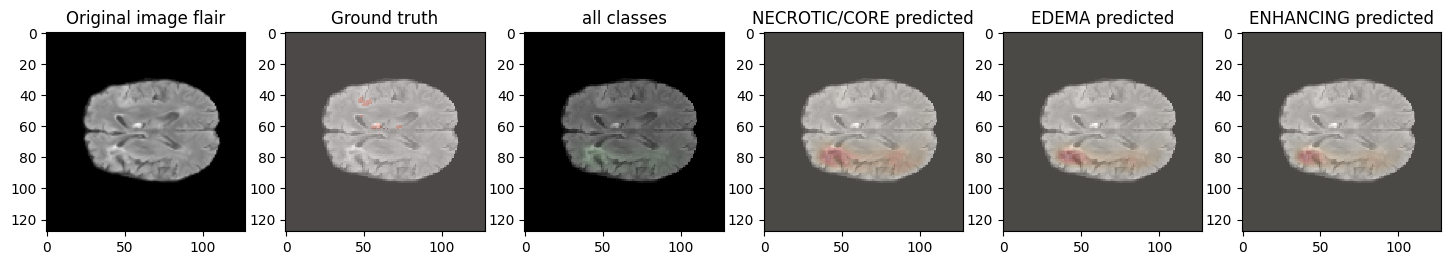

4/4 [==============================] - 0s 44ms/step


<Figure size 1800x5000 with 0 Axes>

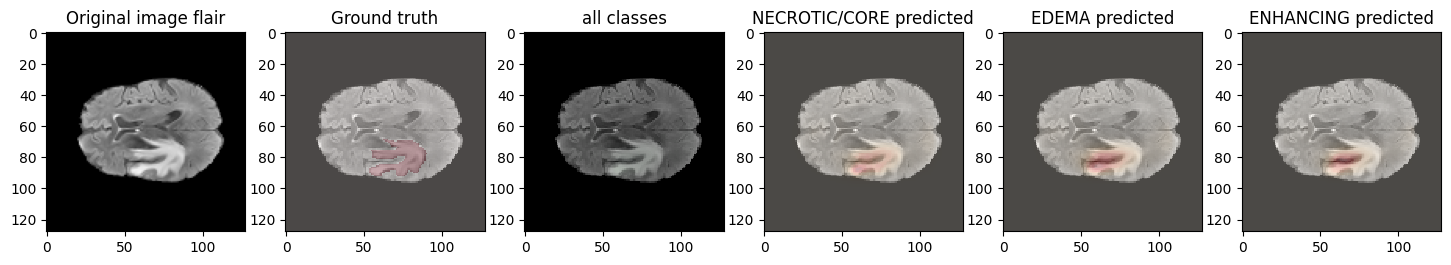

4/4 [==============================] - 0s 45ms/step


<Figure size 1800x5000 with 0 Axes>

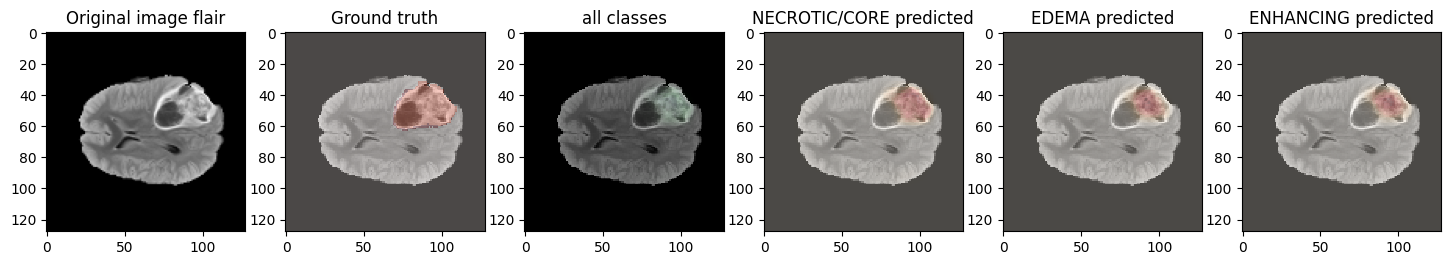

In [ ]:
def predictByPath(case_path,case):
    files = next(os.walk(case_path))[2]
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 2))
  #  y = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE))
    
    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii');
    flair=nib.load(vol_path).get_fdata()
    
    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_t1ce.nii');
    ce=nib.load(vol_path).get_fdata() 
    
 #   vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_seg.nii');
 #   seg=nib.load(vol_path).get_fdata()  

    
    for j in range(VOLUME_SLICES):
        X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
 #       y[j,:,:] = cv2.resize(seg[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        
  #  model.evaluate(x=X,y=y[:,:,:,0], callbacks= callbacks)
    return model.predict(X/np.max(X), verbose=1)


def showPredictsById(case, start_slice = 60):
    path = f"/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
    gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
    origImage = nib.load(os.path.join(path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()
    p = predictByPath(path,case)

    core = p[:,:,:,1]
    edema= p[:,:,:,2]
    enhancing = p[:,:,:,3]

    plt.figure(figsize=(18, 50))
    f, axarr = plt.subplots(1,6, figsize = (18, 50)) 

    for i in range(6): # for each image, add brain background
        axarr[i].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray", interpolation='none')
    
    axarr[0].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
    axarr[0].title.set_text('Original image flair')
    curr_gt=cv2.resize(gt[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
    axarr[1].imshow(curr_gt, cmap="Reds", interpolation='none', alpha=0.3) # ,alpha=0.3,cmap='Reds'
    axarr[1].title.set_text('Ground truth')
    axarr[2].imshow(p[start_slice,:,:,1:4], cmap="Reds", interpolation='none', alpha=0.3)
    axarr[2].title.set_text('all classes')
    axarr[3].imshow(edema[start_slice,:,:], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[3].title.set_text(f'{SEGMENT_CLASSES[1]} predicted')
    axarr[4].imshow(core[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[4].title.set_text(f'{SEGMENT_CLASSES[2]} predicted')
    axarr[5].imshow(enhancing[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[5].title.set_text(f'{SEGMENT_CLASSES[3]} predicted')
    plt.show()
    
    
showPredictsById(case=test_ids[0][-3:])
showPredictsById(case=test_ids[1][-3:])
showPredictsById(case=test_ids[2][-3:])
showPredictsById(case=test_ids[3][-3:])
showPredictsById(case=test_ids[4][-3:])
showPredictsById(case=test_ids[5][-3:])
showPredictsById(case=test_ids[6][-3:])


4/4 [==============================] - 0s 66ms/step


<Figure size 640x480 with 0 Axes>

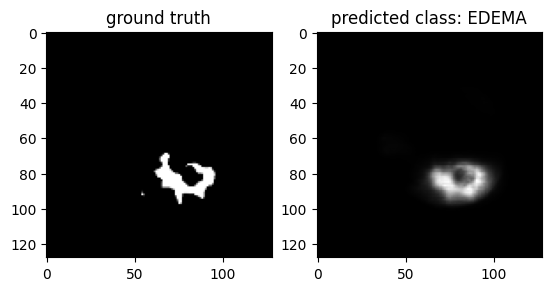

In [ ]:
case = case=test_ids[3][-3:]
path = f"/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
p = predictByPath(path,case)


core = p[:,:,:,1]
edema= p[:,:,:,2]
enhancing = p[:,:,:,3]


i=40 # slice at
eval_class = 2 #     0 : 'NOT tumor',  1 : 'ENHANCING',    2 : 'CORE',    3 : 'WHOLE'



gt[gt != eval_class] = 1 # use only one class for per class evaluation 

resized_gt = cv2.resize(gt[:,:,i+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(resized_gt, cmap="gray")
axarr[0].title.set_text('ground truth')
axarr[1].imshow(p[i,:,:,eval_class], cmap="gray")
axarr[1].title.set_text(f'predicted class: {SEGMENT_CLASSES[eval_class]}')
plt.show()


4/4 [==============================] - 0s 64ms/step


<Figure size 640x480 with 0 Axes>

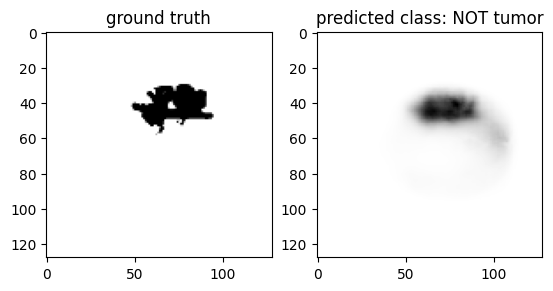

<Figure size 640x480 with 0 Axes>

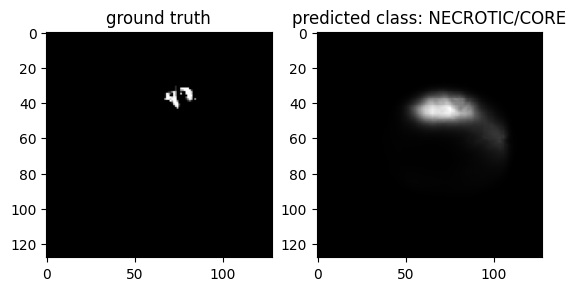

<Figure size 640x480 with 0 Axes>

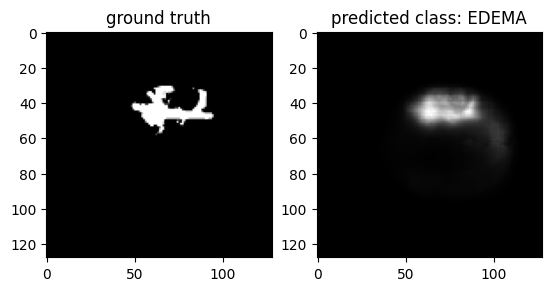

<Figure size 640x480 with 0 Axes>

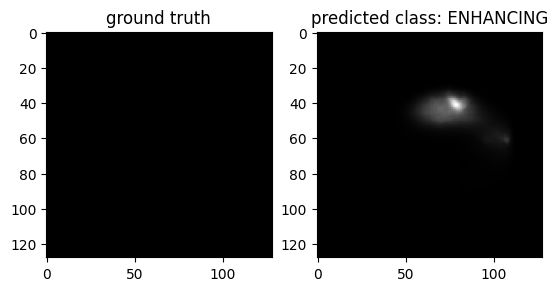

In [ ]:
case = case=test_ids[10][-3:]
path = f"/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
p = predictByPath(path,case)


core = p[:,:,:,1]
edema= p[:,:,:,2]
enhancing = p[:,:,:,3]


i=40 # slice at



# We need to show an overview of all segmentation classes
#     0 : 'NOT tumor',  1 : 'ENHANCING',    2 : 'CORE',    3 : 'WHOLE'
for eval_class in SEGMENT_CLASSES:
    
    gt_single_class = gt.copy()
    
    gt_single_class[gt_single_class != eval_class] = -1 # use only one class for per class evaluation 

    resized_gt = cv2.resize(gt_single_class[:,:,i+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

    plt.figure()
    f, axarr = plt.subplots(1,2) 
    axarr[0].imshow(resized_gt, cmap="gray")
    axarr[0].title.set_text('ground truth')
    axarr[1].imshow(p[i,:,:,eval_class], cmap="gray")
    axarr[1].title.set_text(f'predicted class: {SEGMENT_CLASSES[eval_class]}')
    plt.show()

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema, dice_coef_enhancing] )
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=100, callbacks= callbacks)
print("test loss, test acc:", results)

Evaluate on test data
36/36 [==============================] - 19s 459ms/step - loss: 0.0418 - accuracy: 0.9890 - mean_io_u_2: 0.7084 - dice_coef: 0.3652 - precision: 0.9939 - sensitivity: 0.9820 - specificity: 0.9978 - dice_coef_necrotic: 0.2110 - dice_coef_edema: 0.4635 - dice_coef_enhancing: 0.3512
test loss, test acc: [0.04179171100258827, 0.9890347123146057, 0.7084038257598877, 0.36522507667541504, 0.9938790798187256, 0.9819712042808533, 0.9977938532829285, 0.21098989248275757, 0.4635160267353058, 0.351168692111969]
